# Learn about Obi-Wan Kenobi

Are you a star wars fan? If not, this exercise will help you learn about one of the most important character of the saga: Obi-Wan Kenobi. We will scrap a wikipedia page and create a word cloud to understand what comes out of the article. 

* To focus on NLP, let's use the following code to retrieve a clean HTML page from a variable. We will see later in the program how it works: 

```
import requests
from bs4 import BeautifulSoup
r = requests.get( "https://fr.wikipedia.org/wiki/Obi-Wan_Kenobi" )
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')

corpus = [ ]
for p in soup.find_all("p"):
  corpus.append(p.text)
```

In [ ]:
# clean corpus strip join into one big text
# word cloud of the later 
# add stop words 
# word cloud of the later
# lemmatize everything 
# word cloud the later 
# find and add common words to the stop word list and update the document 
# word cloud the later 
# Lemmatise again everthing and add it to a tfidf 
# plot highest tfidf scores to have a plot that illustrate the importance of every words 

In [68]:
import requests
from bs4 import BeautifulSoup
r = requests.get("https://fr.wikipedia.org/wiki/Obi-Wan_Kenobi")
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')
 
corpus = []
for p in soup.find_all("p"):
    corpus.append(p.text)

# Visualization of first element
corpus[:1]

['\n\t\t\t\tPages pour les contributeurs déconnectés en savoir plus\n']

* We need to install `spacy` modules corresponding to the language specifics (in this case French). So install `en_core_news_sm`. 
  * Feel free to help you with documentation: [English](https://spacy.io/models/fr)

In [55]:
!python -m spacy download fr_core_news_sm -q

✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


* Since text is in french, import now `fr_core_news_sm` --> [Documentation](https://spacy.io/models)

In [ ]:
# clean corpus strip join into one big text
# word cloud of the later 
# add stop words 
# word cloud of the later
# lemmatize everything 
# word cloud the later 
# find and add common words to the stop word list and update the document 
# word cloud the later 
# Lemmatise again everthing and add it to a tfidf 
# plot highest tfidf scores to have a plot that illustrate the importance of every words 

In [69]:
import fr_core_news_sm

nlp = fr_core_news_sm.load()

* For the rest, we need to create a complete corpus of text in a variable. This is a best-practice in the use of spacy. So you will need to create a clean corpus of text. You can do this with the help of : 
  * join()
  * strip() 
  
* Make some basic cleanings :
  * remove special characters
  * make sure there are no uppercase

In [72]:
striped_corpus = []
for sentence in corpus: 
    striped_corpus.append(sentence.strip())

    

In [75]:
striped_corpus

'Contents\n\t\t\t\tmove to sidebar\nhide'

In [76]:
stripped_corpus = [text.strip() for text in corpus]
clean_corpus = " ".join(stripped_corpus)

In [78]:
import re
clean_corpus = re.sub(r"[!\"#$%&()*+,-./:;<=>?@[\\\]^_`{|}~]+", "", clean_corpus).lower()

* Now load your clean corpus in a `doc` object.

In [79]:
doc = nlp(clean_corpus)

* With the `wordcloud` library, create a first word cloud 

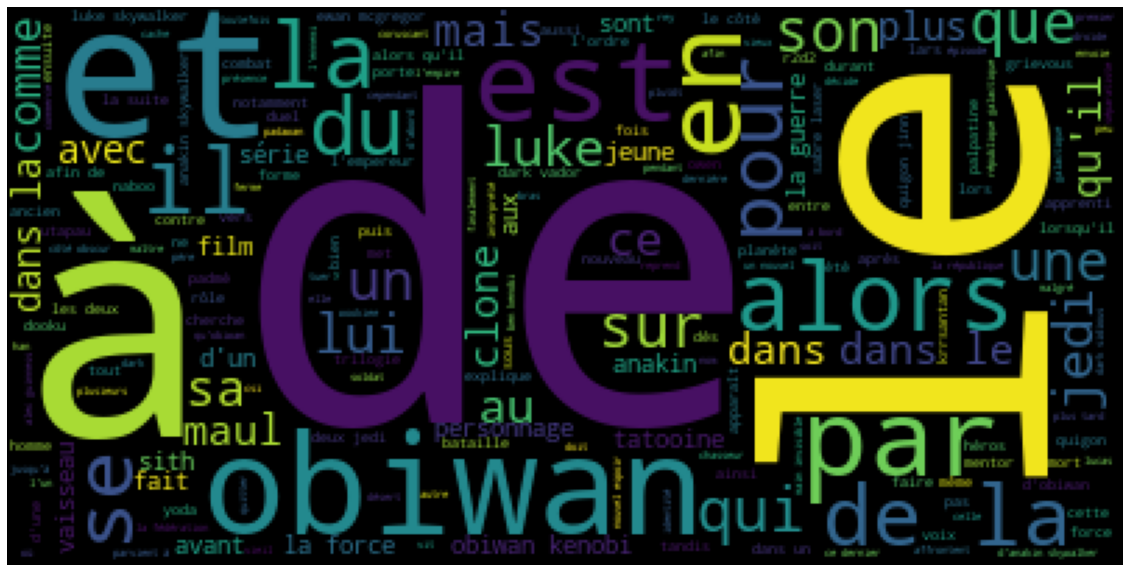

In [80]:
import numpy as np
import os
import matplotlib.pyplot as plt
import wordcloud

wd = wordcloud.WordCloud()
cloud = wd.generate(doc.text)

plt.figure(figsize = (20, 20))
plt.imshow(cloud)
plt.axis("off")

plt.show()

* Now import the stop-words present in `spacy`

In [62]:
from spacy.lang.fr.stop_words import STOP_WORDS

for i, word in enumerate(STOP_WORDS):
    if i < 10:
        print(word)
    else:
         break

semblable
egalement
être
n'
â
neanmoins
dès
ouverte
suffisant
celui-ci


* Make a word cloud again without the stop words

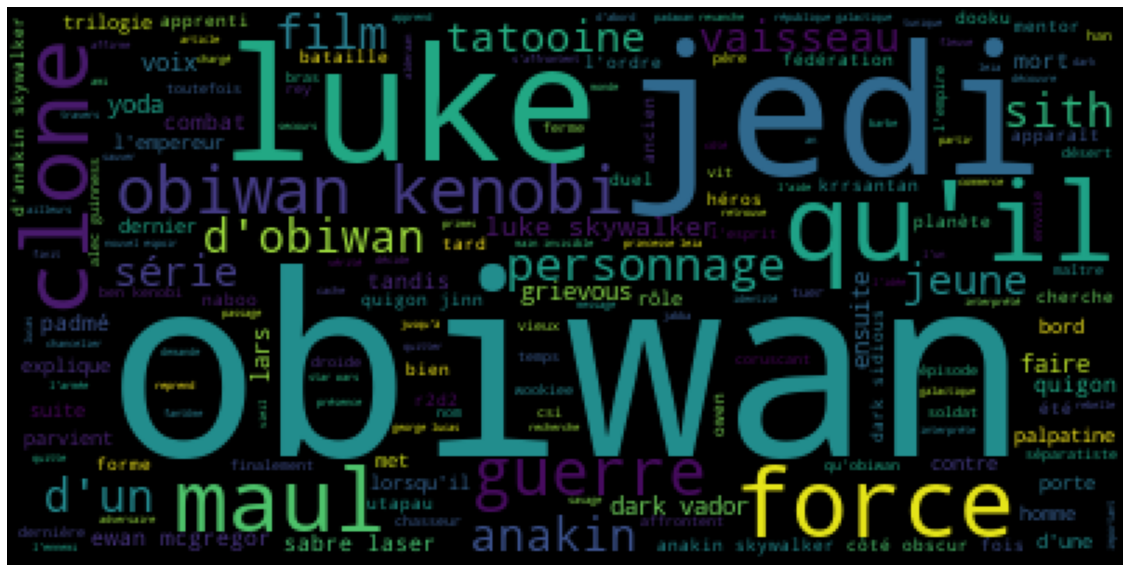

In [82]:
wd = wordcloud.WordCloud(stopwords = STOP_WORDS)

cloud = wd.generate(doc.text)

plt.figure(figsize = (20, 20))
plt.imshow(cloud)
plt.axis("off")
plt.show()

* We would need to have a corpus of lemmatized words, recreate a corpus of lemmatized words and visualize your new word cloud

In [83]:
"a"  in ["a", "b"]

True

In [84]:
"a"  not in ["a", "b"]

False

In [ ]:
for token in doc:
    if token.lemma_ not in STOP_WORDS:
        

In [ ]:
doc.text

In [42]:
lemma = [token.lemma_ for token in doc]
corpus_lemma = " ".join(lemma)


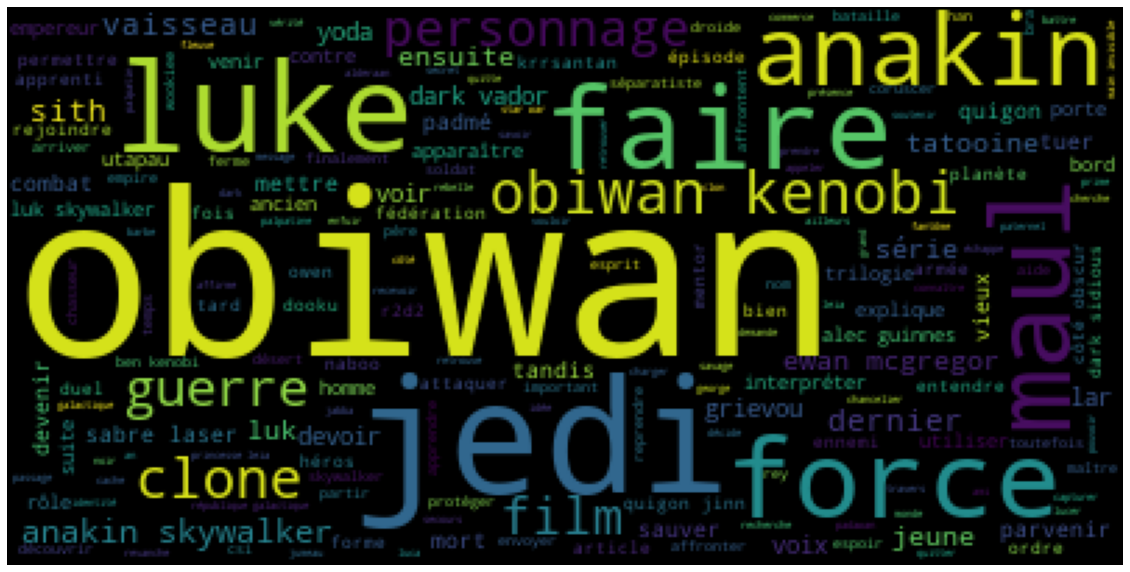

In [87]:
wd = wordcloud.WordCloud(stopwords=STOP_WORDS)

cloud = wd.generate(corpus_lemma)

plt.figure(figsize = (20, 20))
plt.imshow(cloud)
plt.axis("off")
plt.show()

In [90]:
lemma = [token.lemma_ for token in doc if token.lemma_ not in STOP_WORDS]
corpus_lemma = " ".join(lemma)


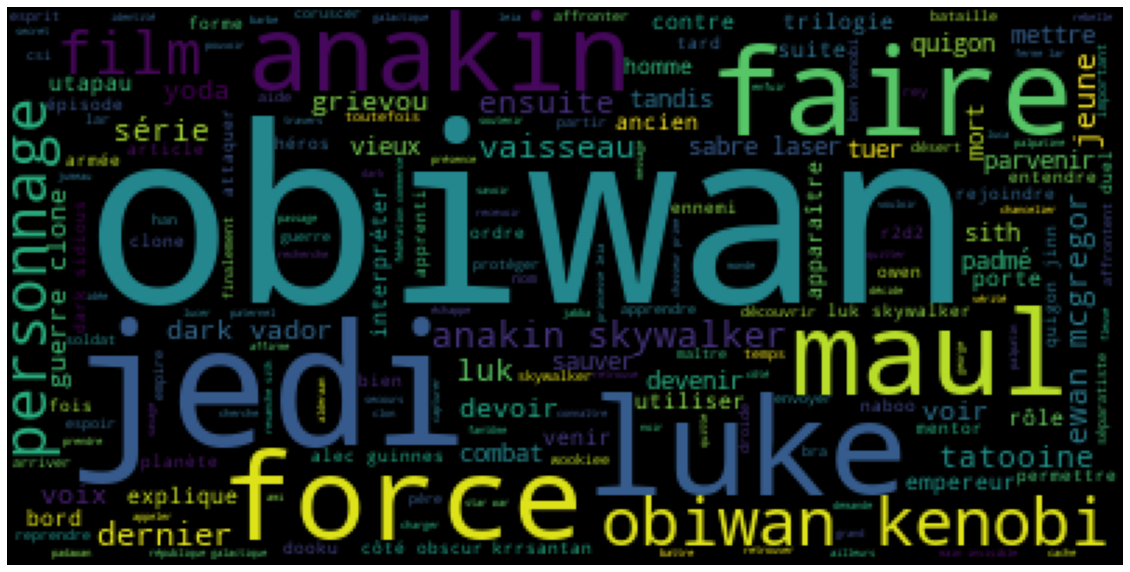

In [91]:
wd = wordcloud.WordCloud()

cloud = wd.generate(corpus_lemma)

plt.figure(figsize = (20, 20))
plt.imshow(cloud)
plt.axis("off")
plt.show()

* Let's push analysis further! Some words are really common in our corpus, find which of them

In [107]:
to_add = set(pd.Series(lemma).value_counts()[pd.Series(lemma).value_counts() > 15].index)

{'anakin',
 'dark',
 'faire',
 'force',
 'jedi',
 'kenobi',
 'luke',
 'obiwan',
 'skywalker',
 '\xa0'}

In [ ]:
for word in to_add : 
    STOP_WORDS.add(word)

In [53]:
import pandas as pd 

lemmadf = pd.Series(lemma)
common = lemmadf.value_counts()>15
common = common[common]
common[:10]

Series([], dtype: bool)

* Update your list of stop words with the common words

In [45]:
new_stop_words = common.index
STOP_WORDS_updated = STOP_WORDS.union(new_stop_words)

In [ ]:
STOP_WORDS_updated = STOP_WORDS.union(set(pd.Series(lemma).value_counts()[pd.Series(lemma).value_counts() > 15].index))

* Create a new word cloud 

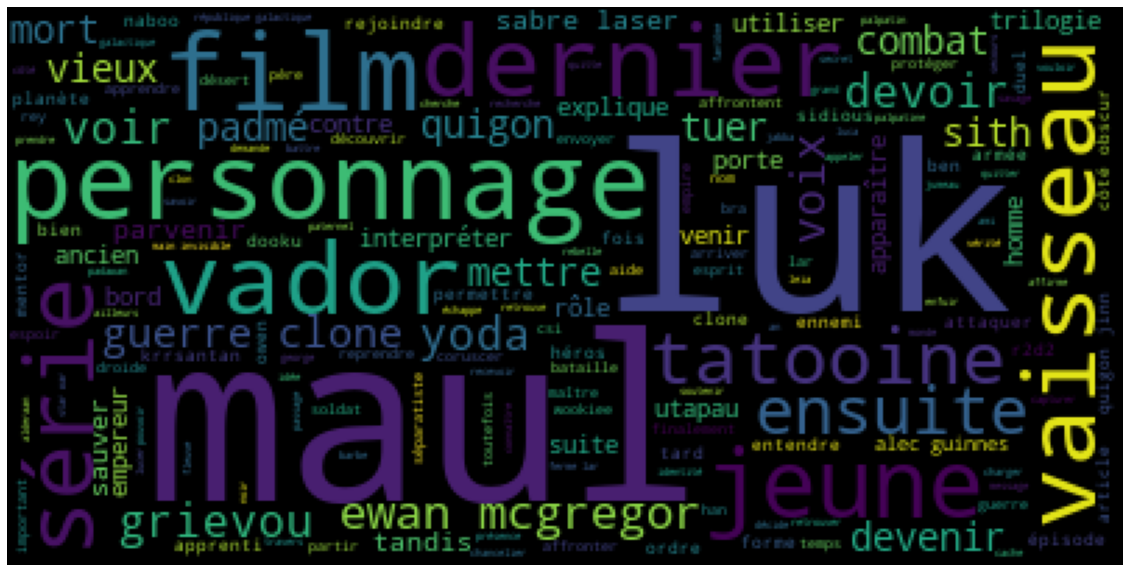

In [110]:
wd = wordcloud.WordCloud(stopwords=STOP_WORDS_updated)

cloud = wd.generate(corpus_lemma)

plt.figure(figsize = (20, 20))
plt.imshow(cloud)
plt.axis("off")
plt.show()

* We will now start building a tf-idf matrix. Let's first create a DataFrame containing our lemmatized corpus without the updated stop words.

In [114]:
lemmatised_doc = []
for token in doc: 
    if token.lemma_ not in STOP_WORDS_updated: 
        lemmatised_doc.append(token.lemma_)

In [122]:
df = pd.DataFrame(pd.Series(" ".join(lemmatised_doc)), columns=["documents"])

In [47]:
lemma = [token.lemma_ for token in doc if token.lemma_ not in STOP_WORDS_updated]
corpus_lemma = " ".join(lemma)
corpus_series = pd.Series(corpus_lemma)

corpus_df = pd.DataFrame(corpus_series, columns=["documents"])
corpus_df

,documents
0,page contributeur déconnecter savoir content \...


In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X = tf.fit_transform(corpus_df["documents"])


In [127]:
tf.get_feature_names_out()

array(['136', '179', '182', ..., 'évade', 'évènement', 'œuvre'],
      dtype=object)

In [128]:
df = pd.DataFrame(X.toarray(), columns=tf.get_feature_names_out())

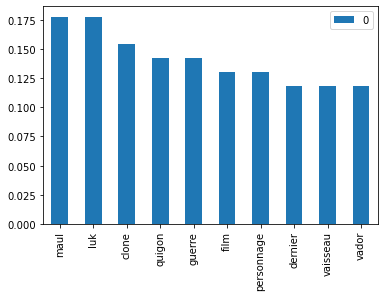

In [137]:
df.T.sort_values(0, ascending=False).iloc[:10].plot(kind='bar');

In [134]:
df.T.sort_values(0, ascending=False).loc[:"vador"]

,0
maul,0.178093
luk,0.178093
clone,0.154347
quigon,0.142474
guerre,0.142474
film,0.130601
personnage,0.130601
dernier,0.118728
vaisseau,0.118728
vador,0.118728


* Let's create now a TF-IDF matrix using `sklearn`

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_df['documents'])
dense = X.toarray()
dense

array([[0.01187283, 0.01187283, 0.01187283, ..., 0.01187283, 0.02374567,
        0.02374567]])

* Visualize most important words using `seaborn`, `matplotlib` or `plotly`

> Help: You can create a dataframe, transpose it and then easily create a visualization

In [49]:
tfid_df = pd.DataFrame(dense, 
                        columns=[x for x in vectorizer.get_feature_names()])

tfid_df

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,136,179,182,19,2000,20003940,2004,2014,2016,2019,...,émission,épique,épisode,épreuve,équilibre,étoile,étouff,évade,évènement,œuvre
0,0.011873,0.011873,0.011873,0.011873,0.011873,0.011873,0.011873,0.011873,0.011873,0.011873,...,0.023746,0.011873,0.059364,0.011873,0.011873,0.023746,0.011873,0.011873,0.023746,0.023746


In [50]:
tfid_df = tfid_df.T

tfid_df["token"] = tfid_df.index

tfid_df

,0,token
136,0.011873,136
179,0.011873,179
182,0.011873,182
19,0.011873,19
2000,0.011873,2000
...,...,...
étoile,0.023746,étoile
étouff,0.011873,étouff
évade,0.011873,évade
évènement,0.023746,évènement


In [51]:
tfid_df.sort_values(by=0, ascending=False)[:15]

,0,token
maul,0.178093,maul
luk,0.178093,luk
clone,0.154347,clone
quigon,0.142474,quigon
guerre,0.142474,guerre
film,0.130601,film
personnage,0.130601,personnage
dernier,0.118728,dernier
vaisseau,0.118728,vaisseau
vador,0.118728,vador


In [52]:
import plotly.express as px

fig = px.bar(tfid_df.sort_values(by=0, ascending=False)[:15], x="token", y=0)

fig.show(renderer="iframe")